# Data Preparation and EDA for IoT23 dataset

In [2]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
from numpy import array
from numpy import argmax
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [105]:
data= pd.read_csv('iot23_combined_1M.csv', low_memory=False)

In [106]:
del data['Unnamed: 0']

# Cleaning Process start! 

# dropping unncessary attributes ! 

In [107]:
df= data.drop(columns=['uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','local_orig','local_resp'])

In [69]:
df.head()

,ts,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,tcp,-,3e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
1,1.536227e+09,tcp,-,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
2,1.536227e+09,tcp,-,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
3,1.536227e+09,tcp,-,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
4,1.536227e+09,tcp,-,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS


Let us separate the target and independent variables 

okkkk... so there are 7 target variables with very few samples.. we would like to remove all those 

In [70]:
df.drop(df[df['label'] == 'C&C-HeartBeat' ].index, inplace = True)

In [71]:
df.drop(df[df['label'] == 'Attack' ].index, inplace = True)

In [72]:
df.drop(df[df['label'] == 'C&C-FileDownload' ].index, inplace = True)

In [73]:
df.drop(df[df['label'] == 'C&C-Mirai' ].index, inplace = True)

In [74]:
df.drop(df[df['label'] == 'C&C-HeartBeat-FileDownload' ].index, inplace = True)

In [75]:
df.drop(df[df['label'] == 'FileDownload' ].index, inplace = True)

In [76]:
df.drop(df[df['label'] == 'C&C-Torii' ].index, inplace = True)

In [108]:
df['orig_bytes'] = df['orig_bytes'].str.replace('-','0')
df['resp_bytes'] = df['resp_bytes'].str.replace('-','0')
df['duration'] = df['duration'].str.replace('-','0')

In [109]:
df.isnull().sum()

ts               0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

In [110]:
df.shape

(1244676, 14)

Separating dependent and independent variables

In [111]:
X= df.iloc[:,:-1]

In [112]:
Y=df['label']

In [113]:
X.shape

(1244676, 13)

In [114]:
Y.unique()

array(['POHS', 'Okiru', 'DDoS', 'C&C-HeartBeat', 'Benign', 'C&C-Torii',
       'C&C', 'C&C-FileDownload', 'FileDownload',
       'C&C-HeartBeat-FileDownload', 'Attack', 'C&C-Mirai'], dtype=object)

so we only remain with 5 classes 

In [115]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244676 entries, 0 to 1244675
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ts             1244676 non-null  float64
 1   proto          1244676 non-null  object 
 2   service        1244676 non-null  object 
 3   duration       1244676 non-null  object 
 4   orig_bytes     1244676 non-null  object 
 5   resp_bytes     1244676 non-null  object 
 6   conn_state     1244676 non-null  object 
 7   missed_bytes   1244676 non-null  float64
 8   history        1244676 non-null  object 
 9   orig_pkts      1244676 non-null  float64
 10  orig_ip_bytes  1244676 non-null  float64
 11  resp_pkts      1244676 non-null  float64
 12  resp_ip_bytes  1244676 non-null  float64
dtypes: float64(6), object(7)
memory usage: 123.4+ MB


In [116]:
X['orig_bytes']=X['orig_bytes'].astype(float)

In [117]:
X['duration']=X['duration'].astype(float)

In [118]:
X['resp_bytes']=X['resp_bytes'].astype(float)

In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244676 entries, 0 to 1244675
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ts             1244676 non-null  float64
 1   proto          1244676 non-null  object 
 2   service        1244676 non-null  object 
 3   duration       1244676 non-null  float64
 4   orig_bytes     1244676 non-null  float64
 5   resp_bytes     1244676 non-null  float64
 6   conn_state     1244676 non-null  object 
 7   missed_bytes   1244676 non-null  float64
 8   history        1244676 non-null  object 
 9   orig_pkts      1244676 non-null  float64
 10  orig_ip_bytes  1244676 non-null  float64
 11  resp_pkts      1244676 non-null  float64
 12  resp_ip_bytes  1244676 non-null  float64
dtypes: float64(9), object(4)
memory usage: 123.4+ MB


In [136]:
Yn=Y.value_counts()

In [40]:
Yarray=np.array(Yn)

In [41]:
Yarray

array([677827, 262690, 149744, 138777,  15093,     30], dtype=int64)

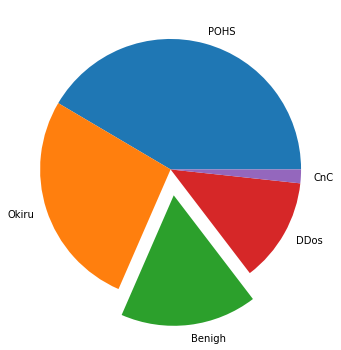

In [203]:
y =Yarray
mylabels = ["POHS", "Okiru", "Benigh", "DDos","CnC"]
myexplode = [0,0,0.2,0,0]
plt.figure(figsize=(6,6))
plt.pie(y, labels = mylabels, explode=myexplode)
plt.show() 

In [120]:
X.head()

,ts,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,1.536227e+09,tcp,-,3000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0
1,1.536227e+09,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0
2,1.536227e+09,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0
3,1.536227e+09,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0
4,1.536227e+09,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0


In [121]:
X = pd.get_dummies(X, columns=['proto'])
X = pd.get_dummies(X, columns=['conn_state'])
X=pd.get_dummies(X,columns=['history'])
X=pd.get_dummies(X,columns=['service'])

In [122]:
X.head()

,ts,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,...,history_Sr,history_^c,history_^d,history_^dDA,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssl
0,1.536227e+09,3000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.536227e+09,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.536227e+09,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.536227e+09,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.536227e+09,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaling=StandardScaler()

In [125]:
X_t=scaling.fit_transform(X)

In [126]:
X_t

array([[-1.04026288,  1.30550294, -0.0017113 , ..., -0.00994136,
        -0.0364004 , -0.00253524],
       [-1.04026288,  0.7087095 , -0.0017113 , ..., -0.00994136,
        -0.0364004 , -0.00253524],
       [-1.04026288,  0.7087095 , -0.0017113 , ..., -0.00994136,
        -0.0364004 , -0.00253524],
       ...,
       [-1.43056801, -0.48487738, -0.0017113 , ..., -0.00994136,
        -0.0364004 , -0.00253524],
       [-1.43056801, -0.48487738, -0.0017113 , ..., -0.00994136,
        -0.0364004 , -0.00253524],
       [-1.43056801, -0.48487738, -0.0017113 , ..., -0.00994136,
        -0.0364004 , -0.00253524]])

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import time as timer

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y, random_state=100, test_size=0.20)

# Gussian Naive Bayes 

In [129]:
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 3.41 seconds


In [130]:
# Predicting the test set results
y_gnb = gnb_model.predict(X_test)
y_gnb_prob = gnb_model.predict_proba(X_test)

In [131]:
print("Classification report for GNB: \n{}".format(classification_report(Y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(Y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(Y_test,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(Y_test,y_gnb,average='weighted')
rec_gnb = recall_score(Y_test,y_gnb,average='weighted')
f1_gnb = f1_score(Y_test,y_gnb,average='weighted')
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for GNB: 
                            precision    recall  f1-score   support

                    Attack       1.00      0.06      0.12        16
                    Benign       1.00      0.11      0.19     30256
                       C&C       0.67      0.11      0.19      3059
          C&C-FileDownload       0.78      1.00      0.88         7
             C&C-HeartBeat       0.26      0.55      0.35        65
C&C-HeartBeat-FileDownload       1.00      1.00      1.00         2
                 C&C-Torii       0.00      0.00      0.00         3
                      DDoS       1.00      0.82      0.90     27803
              FileDownload       0.00      0.00      0.00         2
                     Okiru       0.00      0.00      0.00     52451
                      POHS       0.61      1.00      0.76    135272

                  accuracy                           0.65    248936
                 macro avg       0.57      0.42      0.40    248936
              

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score for GNB: 0.57
Recall score for GNB: 0.65
F1 score for GNB: 0.54


# Logistic Regression 

In [205]:
LogisticRegression?


In [206]:
start = timer.time()
logit_model = LogisticRegression(solver='sag', max_iter=1000, multi_class='multinomial')
logit_model.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 320.72 seconds


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [207]:
# Predicting the test set results
y_logit = logit_model.predict(X_test)
y_logit_prob = logit_model.predict_proba(X_test)

In [208]:
print("Classification report for LR: \n{}".format(classification_report(Y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(Y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(Y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(Y_test,y_logit,average='weighted')
rec_logit = recall_score(Y_test,y_logit,average='weighted')
f1_logit = f1_score(Y_test,y_logit,average='weighted')
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for LR: 
              precision    recall  f1-score   support

      Benign       0.99      0.11      0.20     44764
         C&C       0.98      0.10      0.19      4617
        DDoS       1.00      1.00      1.00     34118
       Okiru       0.00      0.00      0.00     71527
        POHS       0.49      1.00      0.66    110114

    accuracy                           0.56    265140
   macro avg       0.69      0.44      0.41    265140
weighted avg       0.51      0.56      0.44    265140

Confusion matrix for LR: 
[[  4850     12     50      0  39852]
 [     0    478      0      0   4139]
 [     2      0  33996      0    120]
 [    58      0      0      0  71469]
 [     0      0      0      0 110114]]
Accuracy score for LR: 0.56


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score for LR: 0.51
Recall score for LR: 0.56
F1 score for LR: 0.44


In [209]:
cf=confusion_matrix(Y_test,y_logit)

In [210]:
 from sklearn.metrics import plot_confusion_matrix

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


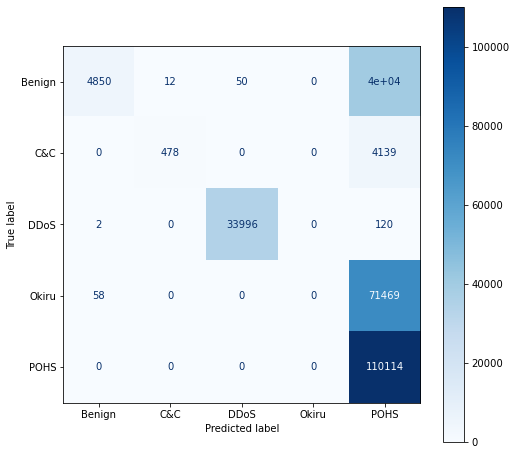

In [213]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(logit_model, X_test, Y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

In [219]:
RandomForestClassifier?

In [135]:
start = timer.time()
Rf_clf=RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state = 0)
Rf_clf.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 535.40 seconds


In [214]:
y_RF = Rf_clf.predict(X_test)
y_RF_prob = Rf_clf.predict_proba(X_test)

In [215]:
print("Classification report for RF: \n{}".format(classification_report(Y_test,y_RF)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(Y_test,y_RF)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(Y_test,y_RF)))
# calculate precision, recall, and f1 scores
prec_rf = precision_score(Y_test,y_RF, average='micro')
rec_rf = recall_score(Y_test,y_RF,average='micro')
f1_rf = f1_score(Y_test,y_RF,average='micro')

Classification report for RF: 
              precision    recall  f1-score   support

      Benign       0.89      0.78      0.83     44764
         C&C       1.00      0.10      0.19      4617
        DDoS       1.00      1.00      1.00     34118
       Okiru       0.74      0.00      0.00     71527
        POHS       0.58      1.00      0.73    110114

    accuracy                           0.68    265140
   macro avg       0.84      0.58      0.55    265140
weighted avg       0.74      0.68      0.58    265140

Confusion matrix for RF: 
[[ 35000      0      1     18   9745]
 [  4139    478      0      0      0]
 [     1      0  33998      0    119]
 [     4      0      0     55  71468]
 [    10      0      0      1 110103]]
Accuracy score for RF: 0.68


In [216]:
cf=confusion_matrix(Y_test,y_RF)

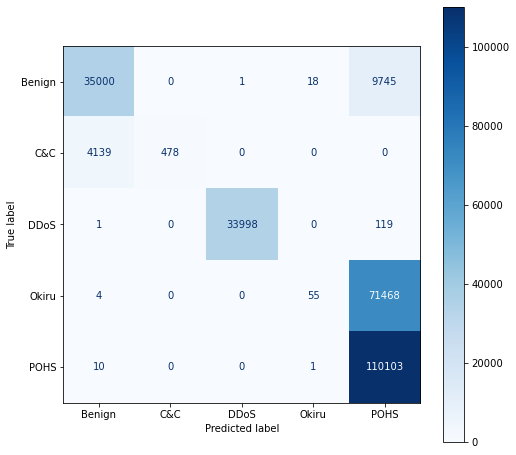

In [218]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(Rf_clf, X_test, Y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

# Decision Tree

In [132]:
start = timer.time()
DT_clf= DecisionTreeClassifier()
DT_clf.fit(X_train,Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 14.03 seconds


In [133]:
y_DT = DT_clf.predict(X_test)
y_DT_prob = DT_clf.predict_proba(X_test)

In [134]:
print("Classification report for DT: \n{}".format(classification_report(Y_test,y_DT)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(Y_test,y_DT)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(Y_test,y_DT)))

# calculate precision, recall, and f1 scores
prec_dt = precision_score(Y_test,y_DT, average='micro')
rec_dt = recall_score(Y_test,y_DT, average='micro')
f1_dt = f1_score(Y_test,y_DT, average='micro')
print("Precision score for DT: {:.2f}".format(prec_dt))
print("Recall score for DT: {:.2f}".format(rec_dt))
print("F1 score for RF: {:.2f}".format(f1_dt))


Classification report for DT: 
                            precision    recall  f1-score   support

                    Attack       1.00      1.00      1.00        16
                    Benign       1.00      0.78      0.88     30256
                       C&C       1.00      0.99      1.00      3059
          C&C-FileDownload       0.78      1.00      0.88         7
             C&C-HeartBeat       0.91      0.98      0.95        65
C&C-HeartBeat-FileDownload       1.00      0.50      0.67         2
                 C&C-Torii       1.00      1.00      1.00         3
                      DDoS       1.00      0.82      0.90     27803
              FileDownload       1.00      1.00      1.00         2
                     Okiru       1.00      0.76      0.86     52451
                      POHS       0.85      1.00      0.92    135272

                  accuracy                           0.90    248936
                 macro avg       0.96      0.89      0.91    248936
              w